# `FedAvg` (E=1, q=1.0, lr=0.01)

In [1]:
from graph_utils.plot_lib import initialize, plot, plot_l2_norms, plot_cosine_similarity
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
initialize()
E_1_LR_0_01 = pd.read_csv('raw_data/METRICS_clients_100_q_100_epoch_1_lr_0.01.csv', header=[0,1])

## Overview

### Loss

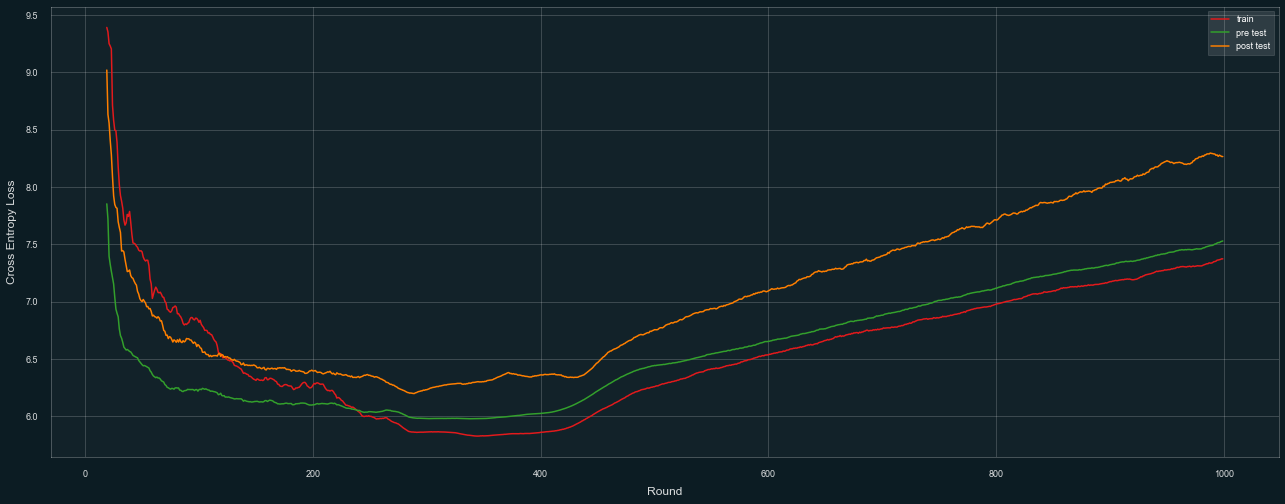

In [3]:
plt.plot(E_1_LR_0_01['train_loss'].mean(axis=1).rolling(20).mean(), label='train')
plt.plot(E_1_LR_0_01['pre_test_loss'].mean(axis=1).rolling(20).mean(), label='pre test')
plt.plot(E_1_LR_0_01['post_test_loss'].mean(axis=1).rolling(20).mean(), label='post test')
plt.legend()
plt.xlabel('Round')
plt.ylabel('Cross Entropy Loss')
plt.show()

### Accuracy

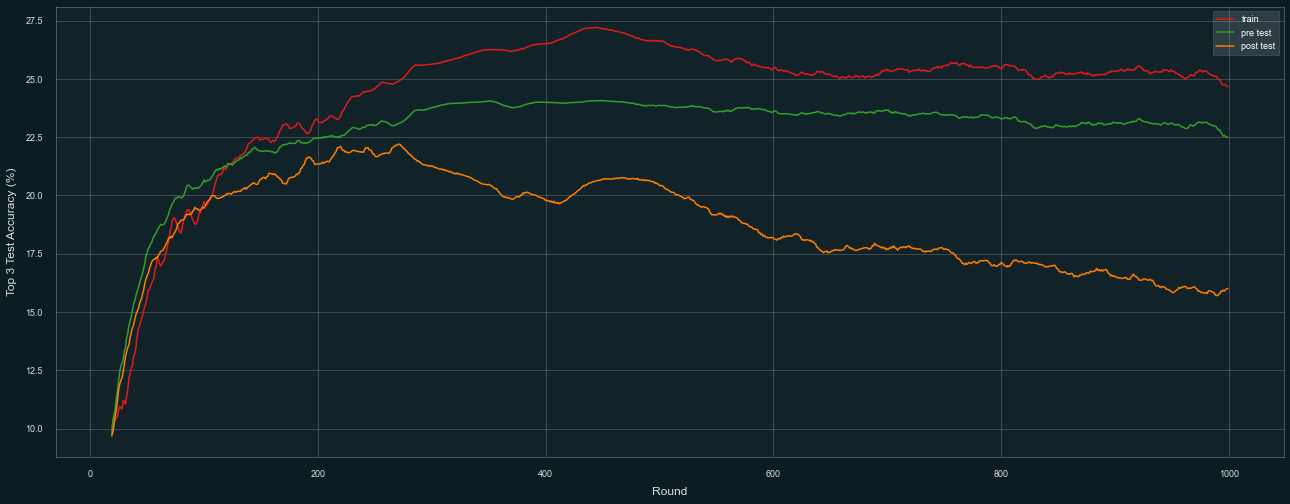

In [4]:
plt.plot(E_1_LR_0_01['train_acc'].mean(axis=1).rolling(20).mean() * 100, label='train')
plt.plot(E_1_LR_0_01['pre_test_acc'].mean(axis=1).rolling(20).mean() * 100, label='pre test')
plt.plot(E_1_LR_0_01['post_test_acc'].mean(axis=1).rolling(20).mean() * 100, label='post test')
plt.legend()
plt.xlabel('Round')
plt.ylabel('Top 3 Test Accuracy (%)')
plt.show()

## Client Accuracy Distribution

### Pre-Test

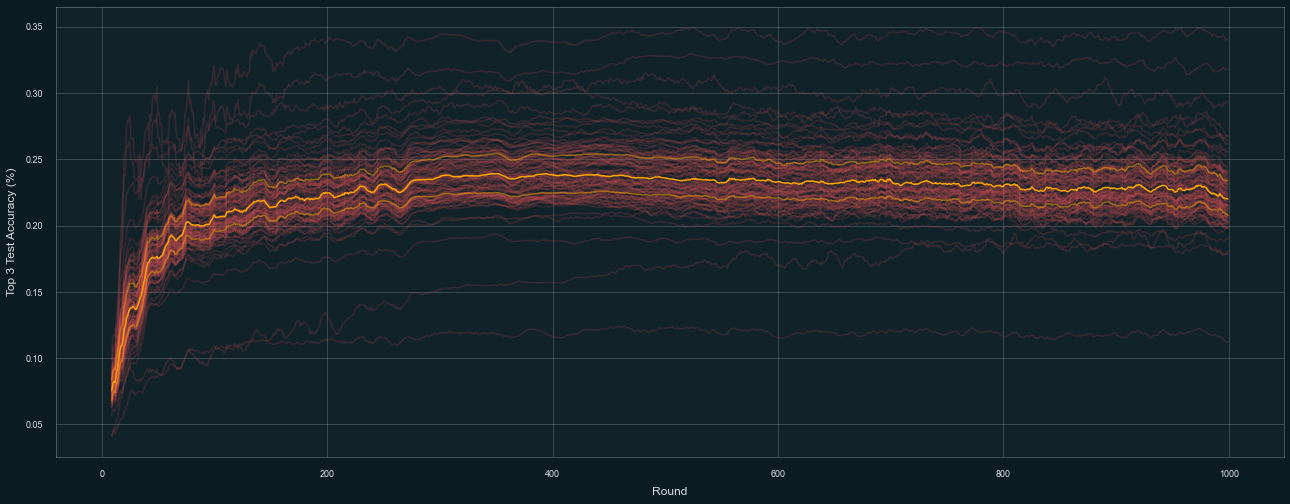

In [5]:
plot(E_1_LR_0_01, 'pre_test_acc', smoothing=10)
plt.xlabel('Round')
plt.ylabel('Top 3 Test Accuracy (%)')
plt.show()

### Train

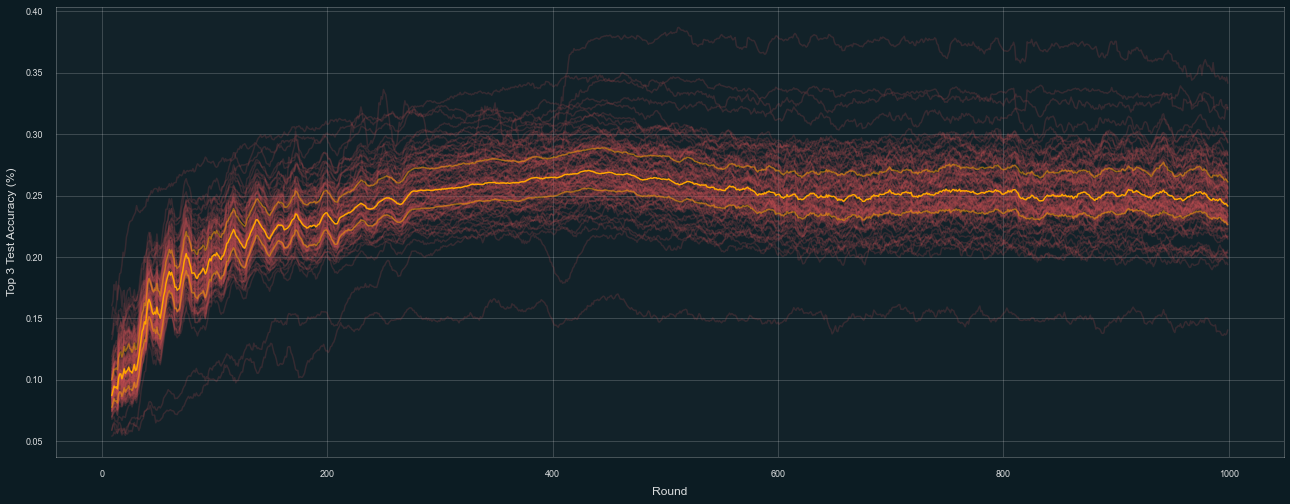

In [6]:
plot(E_1_LR_0_01, 'train_acc', smoothing=10)
plt.xlabel('Round')
plt.ylabel('Top 3 Test Accuracy (%)')
plt.show()

## Client Loss Distribution

### Test

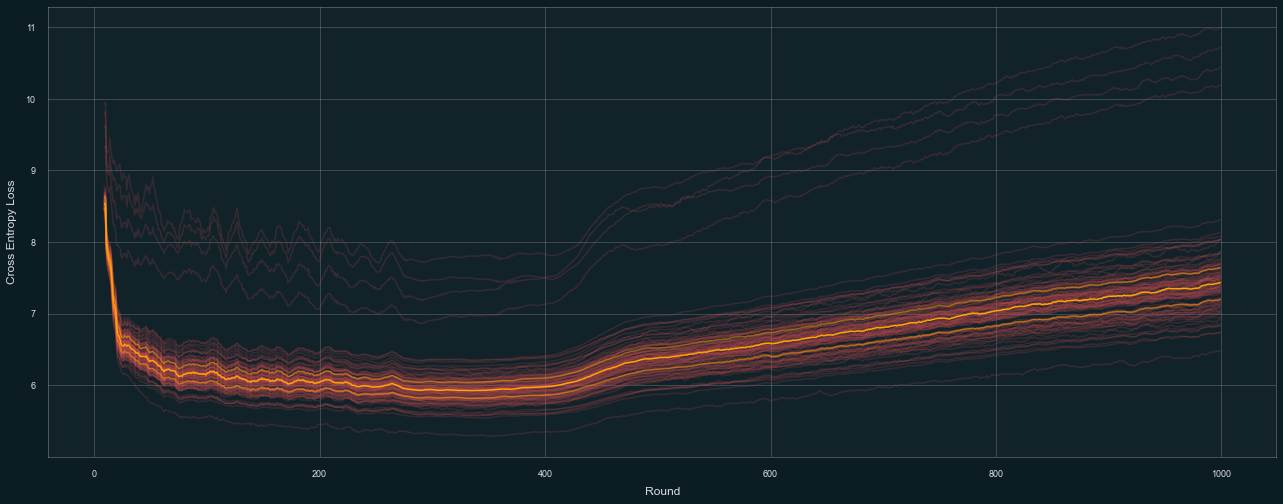

In [7]:
plot(E_1_LR_0_01, 'pre_test_loss', smoothing=10)
plt.xlabel('Round')
plt.ylabel('Cross Entropy Loss')
plt.show()

### Train

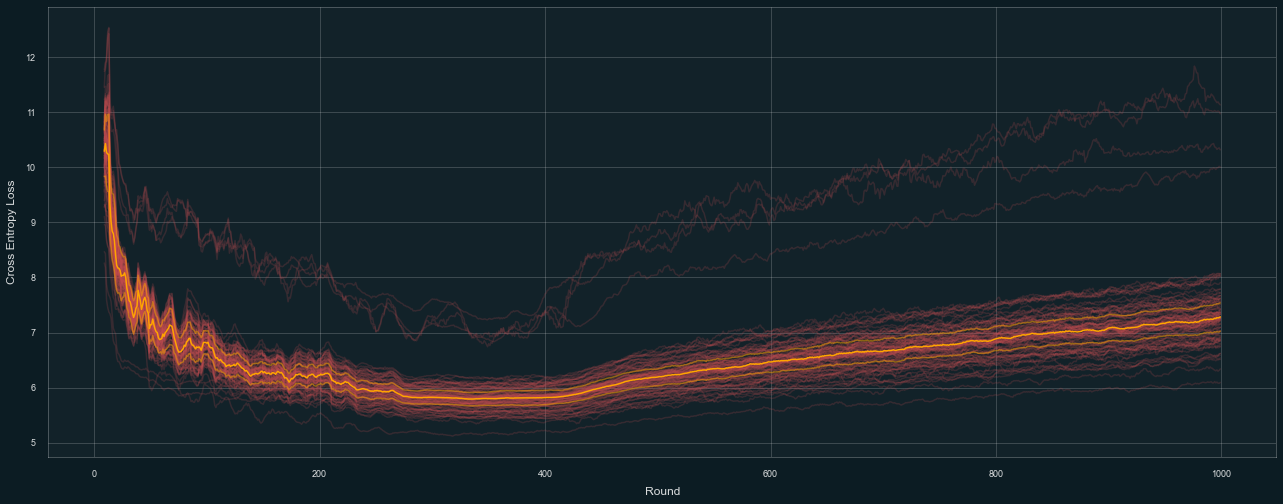

In [8]:
plot(E_1_LR_0_01, 'train_loss', smoothing=10)
plt.xlabel('Round')
plt.ylabel('Cross Entropy Loss')
plt.show()

## Client $L_2$ Norm Distribution

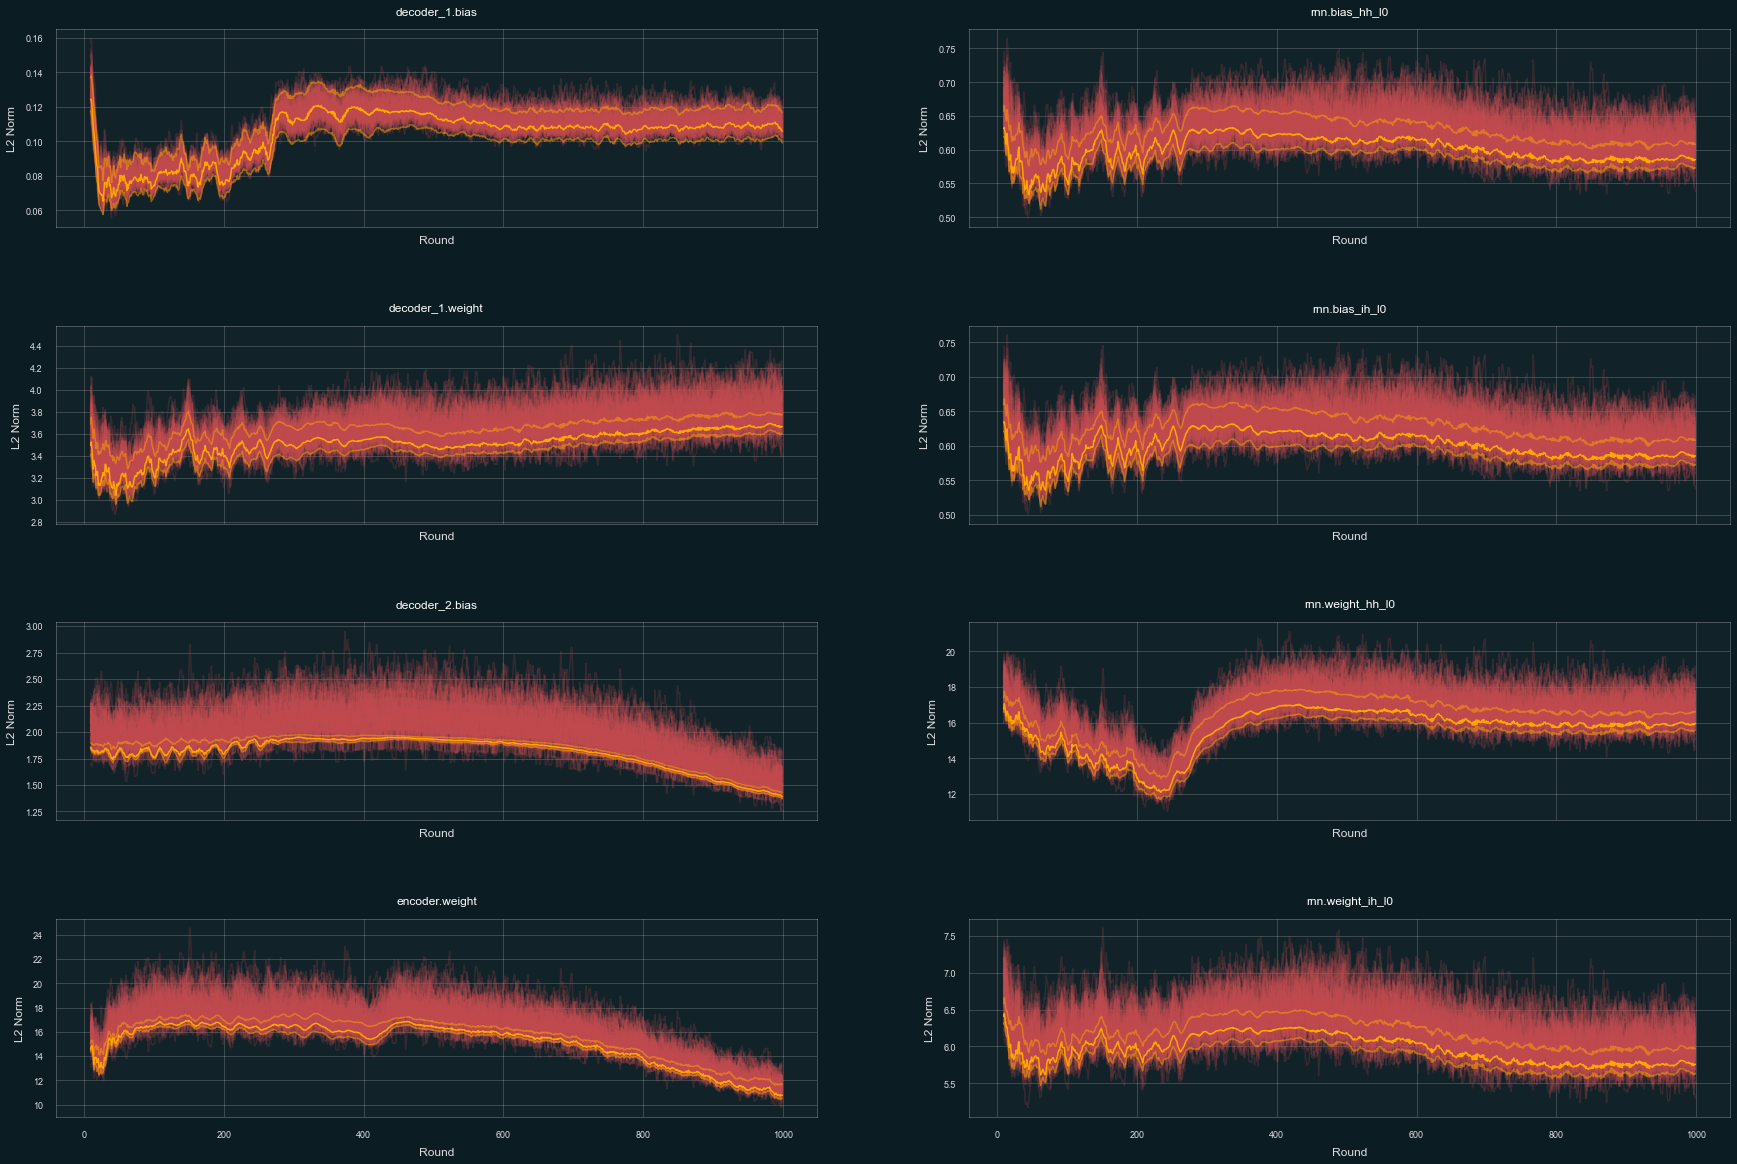

In [12]:
plot_l2_norms(E_1_LR_0_01, smoothing=10)

## Client Average Cosine Similiarity Distribution

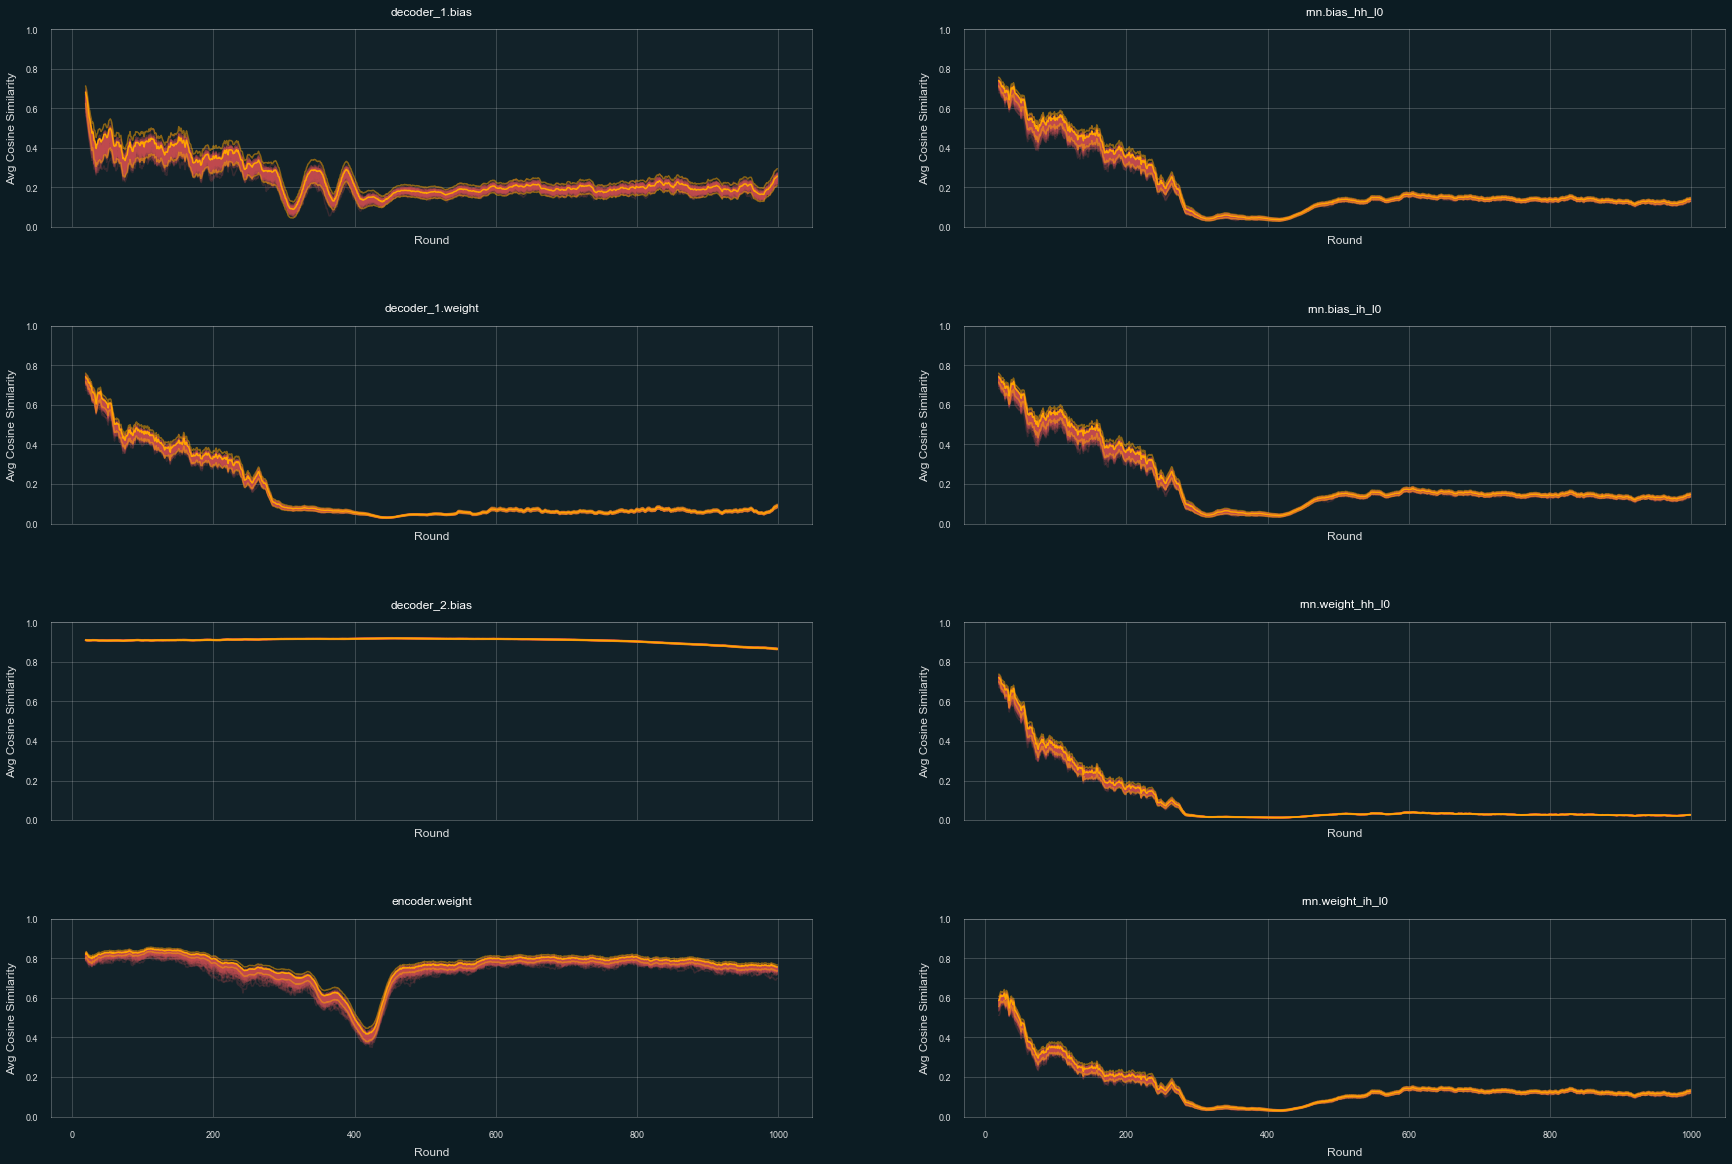

In [10]:
plot_cosine_similarity(E_1_LR_0_01, smoothing=20)

## Observations

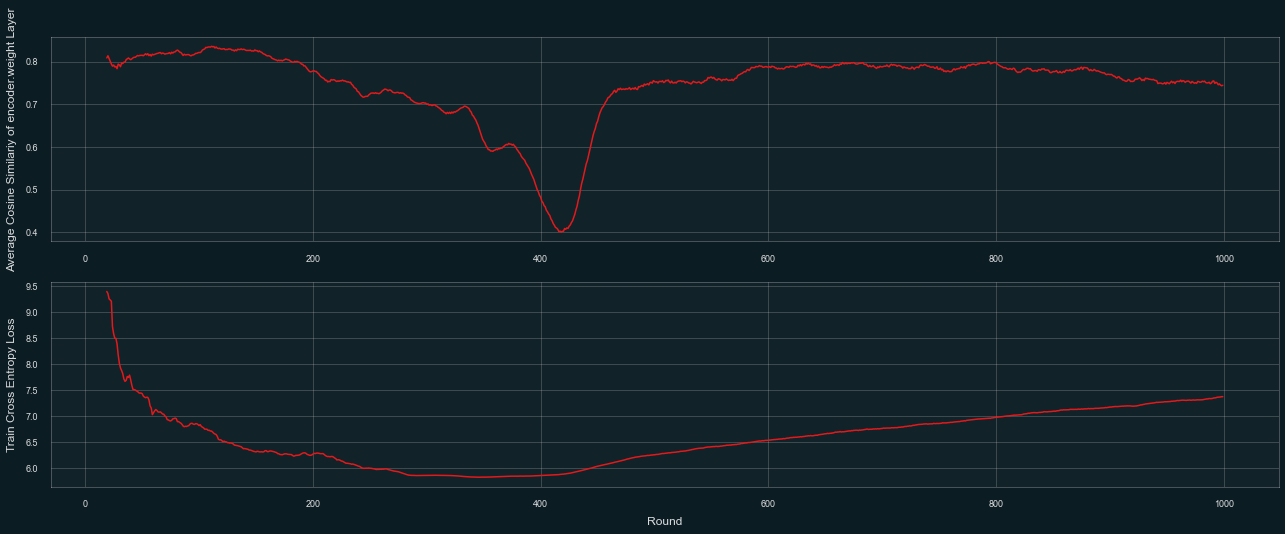

In [11]:
f, (ax1, ax2) = plt.subplots(2, 1)
ax1.plot(E_1_LR_0_01['avg_cosine_encoder.weight'].mean(axis=1).rolling(20).mean())
ax2.plot(E_1_LR_0_01['train_loss'].mean(axis=1).rolling(20).mean())
ax1.set_ylabel('Average Cosine Similariy of encoder.weight Layer')
ax2.set_ylabel('Train Cross Entropy Loss')
ax2.set_xlabel('Round')
plt.show()

Near round **400** the average cosine similarity for `encoder.weight` layer updates (which is the same as updates for the `decoder.weight` layer as these layers share weights) falls. This implies that, on average, the consensus for which direction to update this layer diverges. We also observe that the training loss following the rounds with diverging `encoder.weight` layer updates increases. This means that `FedAvg` following this period is no longer making progress towards its optima, i.e. the model itself is diverging. 